<a href="https://colab.research.google.com/github/sifat173/Face-expression-recognition/blob/main/Face_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
#!cp "/content/gdrive/MyDrive/data.zip" "/content/"



In [4]:
#!unzip -q "/content/data.zip" -d "/content/data"



In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [6]:

# Define constants
img_width = 48
img_height = 48
batch_size = 128
epochs = 100
train_data_dir = '/content/images/images/train'
test_data_dir = '/content/images/images/validation'


In [7]:
# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    color_mode='grayscale',
                                                    class_mode='categorical')
 
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  color_mode='grayscale',
                                                  class_mode='categorical')



Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Epoch 1/100
226/226 [==============================] - 50s 167ms/step - loss: 1.7614 - accuracy: 0.2771 - val_loss: 1.6046 - val_accuracy: 0.3807
Epoch 2/100
226/226 [==============================] - 31s 137ms/step - loss: 1.5694 - accuracy: 0.3875 - val_loss: 1.4176 - val_accuracy: 0.4549
Epoch 3/100
226/226 [==============================] - 31s 136ms/step - loss: 1.4364 - accuracy: 0.4483 - val_loss: 1.3009 - val_accuracy: 0.5017
Epoch 4/100
226/226 [==============================] - 31s 139ms/step - loss: 1.3556 - accuracy: 0.4805 - val_loss: 1.2371 - val_accuracy: 0.5242
Epoch 5/100
226/226 [==============================] - 31s 136ms/step - loss: 1.3014 - accuracy: 0.5016 - val_loss: 1.1880 - val_accuracy: 0.5487
Epoch 6/100
226/226 [==============================] - 29s 130ms/step - loss: 1.2561 - accuracy: 0.5218 - val_loss: 1.1728 - val_accuracy: 0.5526
Epoch 7/100
226/226 [==============================] - 31s 137ms/step - loss: 1.2359 - accuracy: 0.5289 - val_loss: 1.1421 -

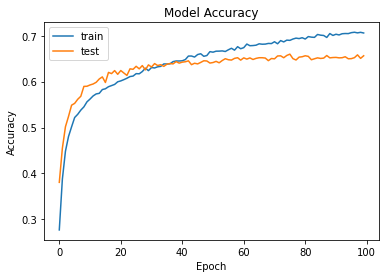

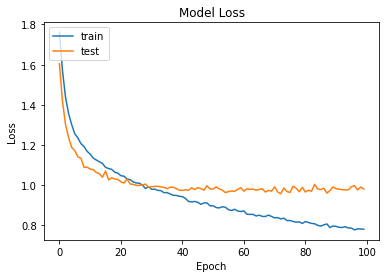

In [8]:



# Define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=test_generator)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [9]:
model.save('m_path')
loaded_model = tf.keras.models.load_model('m_path')


In [10]:
!pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
#loaded_model = tf.keras.models.load_model('m_path')


In [12]:
#pip install opencv-python-headless

In [13]:
#sudo adduser SIFAT video


In [14]:
import cv2

# Create a VideoCapture object
cap = cv2.VideoCapture(0)

# Check if the VideoCapture object is opened successfully
if not cap.isOpened():
    print("Cannot open camera")
else:
    print("Camera is connected and functioning properly")

# Release the VideoCapture object
cap.release()


Cannot open camera


In [15]:
import cv2
import numpy as np
import tensorflow as tf

# Define constants
IMG_SIZE = 48
EMOTIONS = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# Load the model
loaded_model = tf.keras.models.load_model("m_path")

# Open a connection to the default camera
cap = cv2.VideoCapture(0)

# Continuously capture frames from the camera and make predictions
while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Resize the image to the required input shape of the model
    resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))

    # Normalize the pixel values to be between 0 and 1
    normalized = resized / 255.0

    # Reshape the image to match the input shape of the model
    reshaped = np.reshape(normalized, (1, IMG_SIZE, IMG_SIZE, 1))

    # Make a prediction using the loaded model
    predictions = loaded_model.predict(reshaped)

    # Get the index of the predicted emotion
    index = np.argmax(predictions)

    # Get the corresponding emotion label
    emotion = EMOTIONS[index]

    # Put the predicted emotion label on the frame
    cv2.putText(frame, emotion, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('frame', frame)

    # Wait for the 'q' key to be pressed to quit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close all windows
cap.release()
cv2.destroyAllWindows()


error: ignored

In [ ]:
import cv2

cv2.namedWindow('Emotion Detection',cv2.WINDOW_NORMAL)
# Load the trained model
model = tf.keras.models.load_model(frame)


# Create a dictionary to map the predicted labels to emotions
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Start capturing video from webcam
cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture("droidcam_video")


while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    


    # Convert the image to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Resize the image to match the input size of the model
    img = cv2.resize(gray, (48, 48))

    # Rescale the pixel values to between 0 and 1
    img = img / 255.0

    # Add a batch dimension to the image
    img = np.expand_dims(img, axis=0)

    # Make a prediction using the model
    predictions = model.predict(img)

    # Get the predicted label
    label = np.argmax(predictions)

    # Get the corresponding emotion from the dictionary
    emotion = emotions[label]

    # Draw the predicted emotion on the frame
    cv2.putText(frame, emotion, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show the frame
    cv2.imshow('Emotion Detection', frame)

    # Wait for a key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the resources
cap.release()
cv2.destroyAllWindows()
